In [1]:
import torch
import matplotlib.pyplot as plt
from torch.optim import Adam
from pipeline import forward, get_latent_mean_std, get_latent_from_text

In [2]:
lat_mean, lat_std = get_latent_mean_std()
lat_rep = (torch.randn(lat_mean.shape) * lat_std * 0.85 + lat_mean).detach().requires_grad_(True)

In [3]:
optimizer = Adam(params=[lat_rep],
                 lr=0.001, 
                 maximize=True)

In [11]:
camera_params = {
        "camera_distance": 1.42,
        "camera_angle": 55.,
        "focal_length": 3.15,
        "max_ray_length": (0.5 + 1) * 3.15 + 1.5,
        # Image
        "resolution_y": 100,
        "resolution_x": 100
    }

phong_params = {
    "ambient_coeff": 0.67,
    "diffuse_coeff": 0.79,
    "specular_coeff": 0.3,  # 0.63,
    "shininess": 1.,
    # Colors
    "object_color": torch.tensor([0.61, 0.61, 0.61]),  # torch.tensor([0.63, 0.17, 0.78]),
    "background_color": torch.tensor([0., 0., 0.])  # torch.tensor([0.35, 0.94, 0.26])
}

light_params = {
    "amb_light_color": torch.tensor([0.57, 0.07, 0.69]),
    # light 1
    "light_intensity_1": 0.,  # 1.1,
    "light_color_1": torch.tensor([0.88, 0.99, 0.74]),
    "light_dir_1": torch.tensor([-0.41, -0.51, -0.76]),
    # light p
    "light_intensity_p": 1.,
    "light_color_p": torch.tensor([0.88, 0.99, 0.74]),
    "light_pos_p": torch.tensor([2., 0., 2.])
}

In [12]:
score = forward(lat_rep, "untextured render of a face", camera_params, phong_params, light_params)

In [13]:
score[0].backward()

In [6]:
latent, hist = get_latent_from_text("A woman", n_updates=10)

update step 0 - score: tensor([[19.8012]], grad_fn=<MmBackward0>)
update step 1 - score: tensor([[20.4486]], grad_fn=<MmBackward0>)
update step 2 - score: tensor([[20.6243]], grad_fn=<MmBackward0>)
update step 3 - score: tensor([[20.9231]], grad_fn=<MmBackward0>)
update step 4 - score: tensor([[20.6453]], grad_fn=<MmBackward0>)
update step 5 - score: tensor([[20.8524]], grad_fn=<MmBackward0>)
update step 6 - score: tensor([[21.2400]], grad_fn=<MmBackward0>)
update step 7 - score: tensor([[21.1039]], grad_fn=<MmBackward0>)
update step 8 - score: tensor([[20.8692]], grad_fn=<MmBackward0>)
update step 9 - score: tensor([[21.1895]], grad_fn=<MmBackward0>)


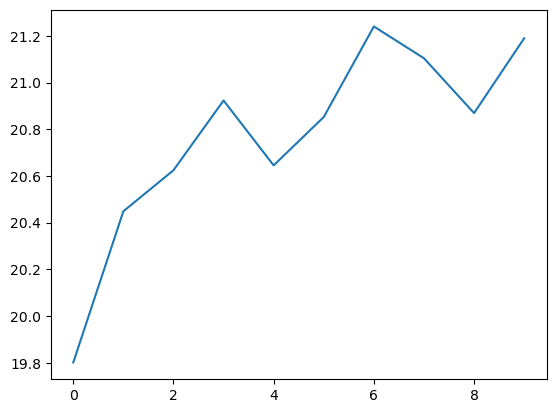

In [7]:
plt.plot(torch.tensor(hist["scores"]).numpy())

In [8]:
torch.save(latent, "optim_latent")

In [ ]:
torch.save(torch.stack(hist["latents"]), "latent_history")

In [ ]:
torch.save(torch.stack(hist["images"]), "render_history")

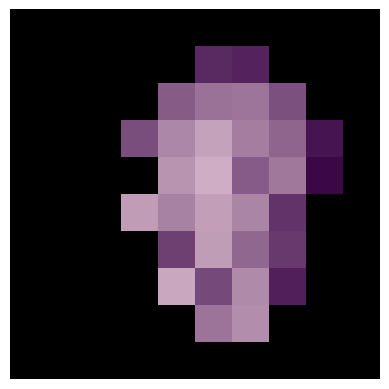

In [9]:
plt.imshow(hist["images"][3].detach().numpy())
plt.axis('off')  # Turn off axes
plt.show()
#plt.savefig(f"optim_img/high_lr_{i}", bbox_inches='tight')

FileNotFoundError: [Errno 2] No such file or directory: 'optim_img/high_lr_5.png'

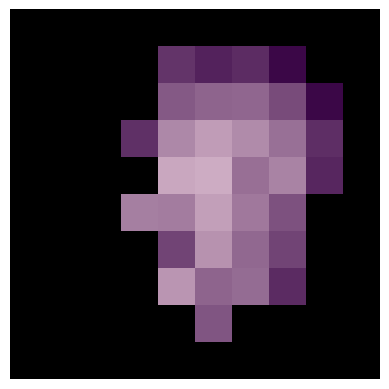

In [10]:
for i, im in enumerate(hist["images"]):
    plt.imshow(im.detach().numpy())
    plt.axis('off')  # Turn off axes
    #plt.show()
    plt.savefig(f"optim_img/high_lr_{5+i}", bbox_inches='tight')